In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
from targetexplore import Targets

In [40]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

np.random.seed(123)

# Number of random pointings
n = 10

# Random RA between 0 and 360 degrees
ra = np.random.uniform(0, 360, n)

# Random Dec between -90 and +90 degrees
dec = np.arcsin(np.random.uniform(-1, 1, n)) * (180 / np.pi)

# Create the SkyCoord object
coords = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame="icrs")

print(coords)

<SkyCoord (ICRS): (ra, dec) in deg
    [(250.72890682, -18.27897076), (103.01016058,  27.26453405),
     ( 81.66652328,  -7.05693103), (198.47331687, -61.72017159),
     (259.00882912, -11.76578609), (152.31832564,  28.42388128),
     (353.07511142, -39.42121115), (246.53870589, -40.47351551),
     (173.13548453,   3.6179249 ), (141.16230655,   3.64964037)]>


In [41]:
tgts = Targets(coords, telescope="MeerKAT", band="5b")

INFO: Query finished. [astroquery.utils.tap.core]


In [42]:
import matplotlib.pyplot as plt

%matplotlib inline

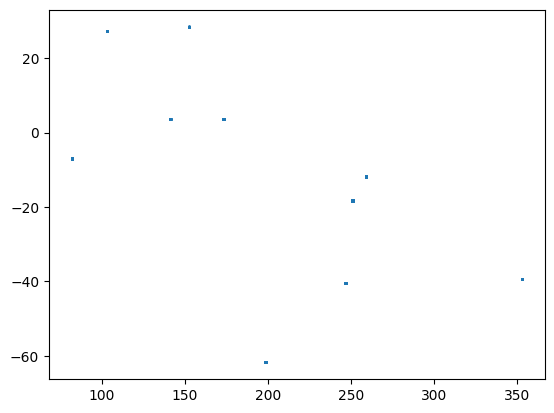

In [43]:
plt.scatter(tgts.table["ra"], tgts.table["dec"], s=1)

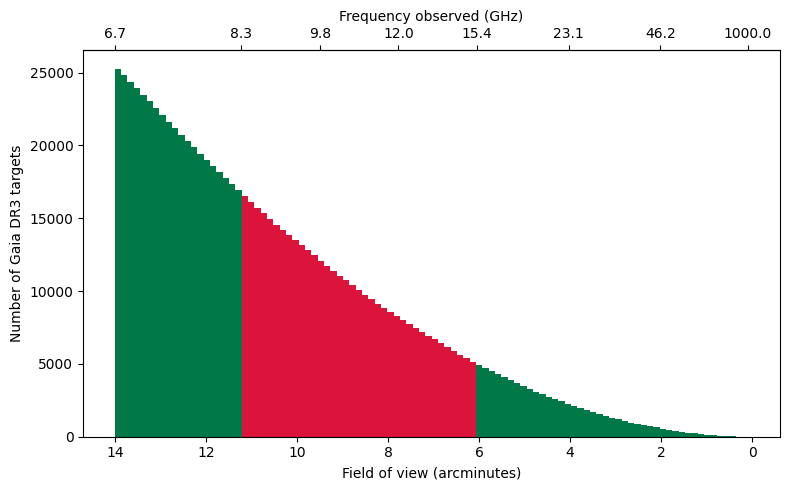

In [44]:
tgts.hist_separation()

<Axes: xlabel='distance (pc)', ylabel='number of targets'>

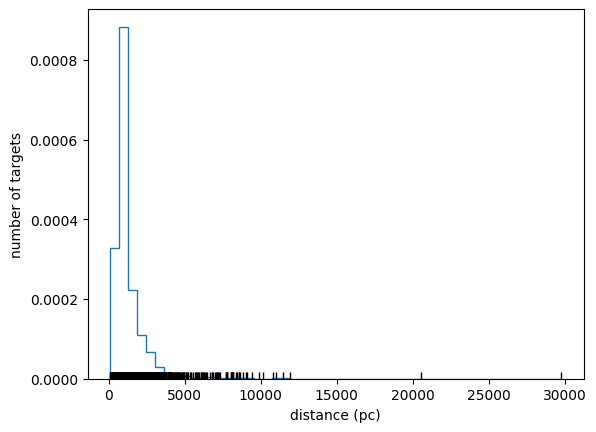

In [45]:
tgts.hist_distance(bins=50, mask_parallax=True)

/datax/users/obs/osea/seticore/python/targetexplore/targets.py:298: RuntimeWarning: invalid value encountered in log10
  return self.table["phot_g_mean_mag"] - 5 * np.log10(self.naive_dist[0]) + 5
/datax/users/obs/osea/seticore/python/targetexplore/_utils/distance.py:15: RuntimeWarning: invalid value encountered in divide
  norm_posterior = posterior / simpson(posterior, r)
/datax/users/obs/osea/seticore/python/targetexplore/_utils/distance.py:15: RuntimeWarning: divide by zero encountered in divide
  norm_posterior = posterior / simpson(posterior, r)


LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

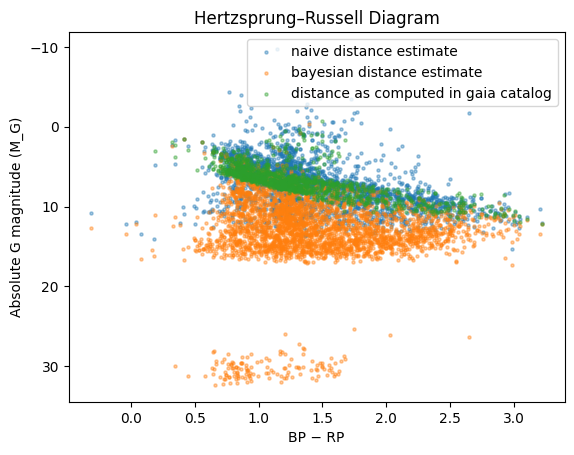

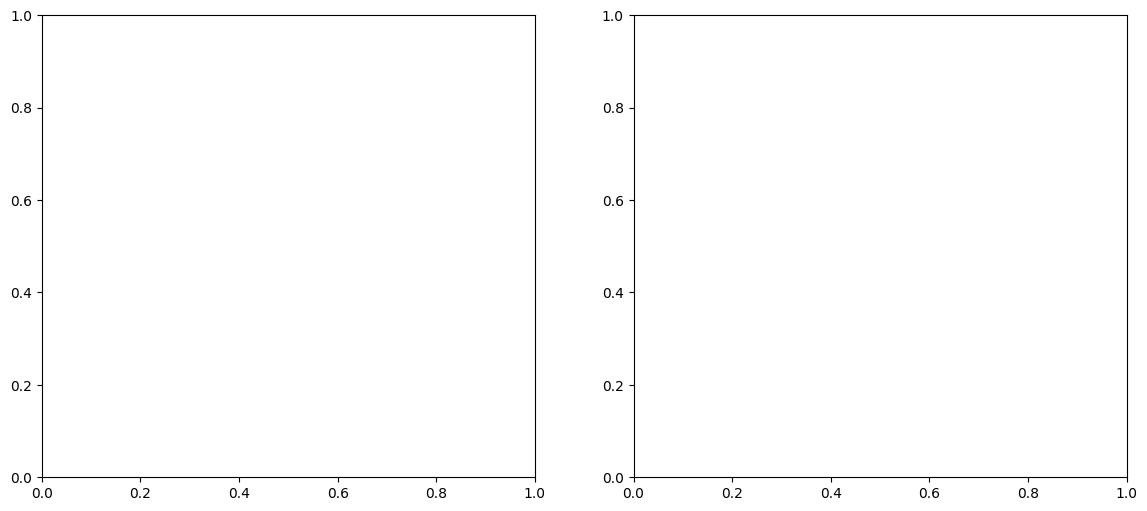

In [6]:
tgts.hr()